In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [2]:
t=pd.read_csv("titanic.csv")

In [3]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
le=LabelEncoder()
t['Sex']=le.fit_transform(t.Sex)

In [5]:
x=t.drop(['Name','PassengerId','Survived','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')

In [6]:
y=t.Survived

In [7]:
median=x['Age'].median()

In [8]:
x['Age']=x['Age'].fillna(median)

In [9]:
median

28.0

In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int32  
 2   Age     891 non-null    float64
 3   Fare    891 non-null    float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 24.5 KB


In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.19)

In [55]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [56]:
dt.score(x_test,y_test)

0.8411764705882353

In [57]:
dt.score(x_train,y_train)

0.9750346740638003

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
cm=confusion_matrix(y_test,y_pred)

In [60]:
cm

array([[91, 18],
       [ 9, 52]], dtype=int64)

<Axes: >

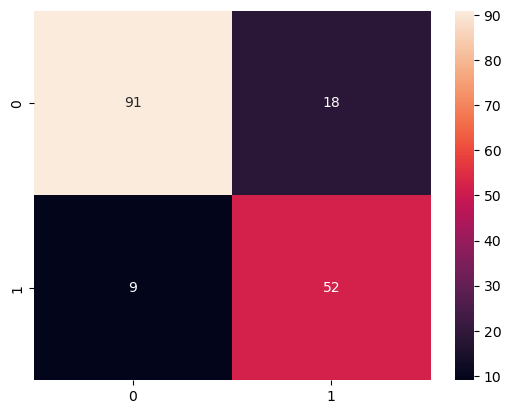

In [61]:
sns.heatmap(cm,annot=True)